#**Week 11 - Case study on Supervised learning**

> _Do the following in the iris dataset:_

1.   **Read the dataset to the python environment**
2.   **Do necessary pre-processing steps**
3.   **Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)**

##**1. Read the dataset to the python environment**

######***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset iris.xls in to Python Environment using read_excel(). The first 5 observations are displayed.***

In [3]:
df=pd.read_excel('/content/gdrive/MyDrive/ICTAK/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


######***Displaying the last 5 observations***

In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


##**2. Do necessary pre-processing steps**

##***Basic details***

######***Identifying the basic details of the dataset***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


######***Finding the no: of Observations***

In [7]:
df.shape

(150, 5)

######***Checking for null values***

In [8]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
SL,7
SW,6
PL,6
PW,0
Classification,0


######***Checking the different classifications of Iris***

In [9]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df[df['Classification']=='Iris-setosa'].describe(include='all')

,SL,SW,PL,PW,Classification
count,47.000000,47.000000,48.000000,50.00000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.008511,3.408511,1.468750,0.24400,NaN
std,0.360452,0.390557,0.175228,0.10721,NaN
min,4.300000,2.300000,1.000000,0.10000,NaN
25%,4.800000,3.100000,1.400000,0.20000,NaN
50%,5.000000,3.400000,1.500000,0.20000,NaN
75%,5.200000,3.650000,1.600000,0.30000,NaN


In [11]:
df[df['Classification']=='Iris-versicolor'].describe(include='all')

,SL,SW,PL,PW,Classification
count,48.000000,48.000000,48.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.925000,2.781250,4.252083,1.326000,NaN
std,0.522474,0.315322,0.475345,0.197753,NaN
min,4.900000,2.000000,3.000000,1.000000,NaN
25%,5.600000,2.600000,4.000000,1.200000,NaN
50%,5.850000,2.800000,4.350000,1.300000,NaN
75%,6.300000,3.000000,4.600000,1.500000,NaN


In [12]:
df[df['Classification']=='Iris-virginica'].describe(include='all')

,SL,SW,PL,PW,Classification
count,48.000000,49.000000,48.000000,50.00000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,6.616667,2.967347,5.547917,2.02600,NaN
std,0.598343,0.322353,0.555433,0.27465,NaN
min,5.600000,2.200000,4.500000,1.40000,NaN
25%,6.275000,2.800000,5.100000,1.80000,NaN
50%,6.500000,3.000000,5.550000,2.00000,NaN
75%,6.950000,3.100000,5.825000,2.30000,NaN


##**Insights:**


*   The dataset contains the features of flowering plant Iris, like:     
      *   _**SL** - Sepal Length in centimeters_      
      *   _**SW** - Sepal Width in centimeters_
      *   _**PL** - Petal Length in centimeters_
      *   _**PW** - Petal Width in centimeters_
      *   _**Classification** - Species of Iris ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']_      
*   **150 Observations** and **5 Features** are found.
*   The **Null values** are recorded for:
      *   _The feature **SL(Sepal Length)** contains **7** null observations_
      *   _The feature **SW(Sepal Width)** contains **6** null observations_
      *   _The feature **PL(Petal Length)** contains **6** null observations_
*  The **datatype** for the features:      
      *   _**Classification** - is given as Objects_
      *   _**SL, SW, PL, PW** - are given as Float with 64-bits_
*   The range of values:
      *   For the Classification - **Iris-setosa**
          *   The **Sepal Length(SL)** ranges from 4.3 to 5.8
          *   The **Sepal Width(SW)** ranges from 2.3 to 4.4
          *   The **Petal Length(PL)** ranges from 1.0 to 1.9
          *   The **Petal Width(PW)** ranges from 0.1 to 0.6
      *   For the Classification - **Iris-versicolor**
          *   The **Sepal Length(SL)** ranges from 4.9 to 7.0
          *   The **Sepal Width(SW)** ranges from 2.0 to 3.4
          *   The **Petal Length(PL)** ranges from 3.0 to 5.1
          *   The **Petal Width(PW)** ranges from 1.0 to 1.8
      *   For the Classification - **Iris-virginica**
          *   The **Sepal Length(SL)** ranges from 5.6 to 7.9
          *   The **Sepal Width(SW)** ranges from 2.2 to 3.8
          *   The **Petal Length(PL)** ranges from 4.5 to 6.9
          *   The **Petal Width(PW)** ranges from 1.4 to 2.5






##***Visualizations***

######***Scatter Plot for Sepal Length with Sepal Width***

Text(0.5, 1.0, 'Scatterness of Sepal Length with Sepal Width')

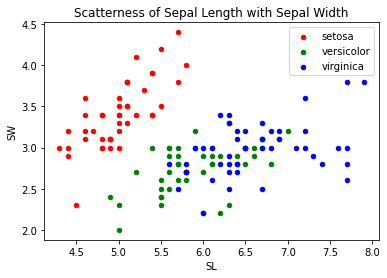

In [13]:
ax = df[df.Classification=='Iris-setosa'].plot.scatter(x='SL', y='SW', 
                                                    color='red', label='setosa')
df[df.Classification=='Iris-versicolor'].plot.scatter(x='SL', y='SW', 
                                                color='green', label='versicolor', ax=ax)
df[df.Classification=='Iris-virginica'].plot.scatter(x='SL', y='SW', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("Scatterness of Sepal Length with Sepal Width")

##**Insights:**
  _As from the above visualization,_

*   Species Setosa has smaller sepal lengths but larger sepal widths.
*   Versicolor Species lies in the middle of the other two species in terms of sepal length and width
*   Species Virginica has larger sepal lengths but smaller sepal widths.





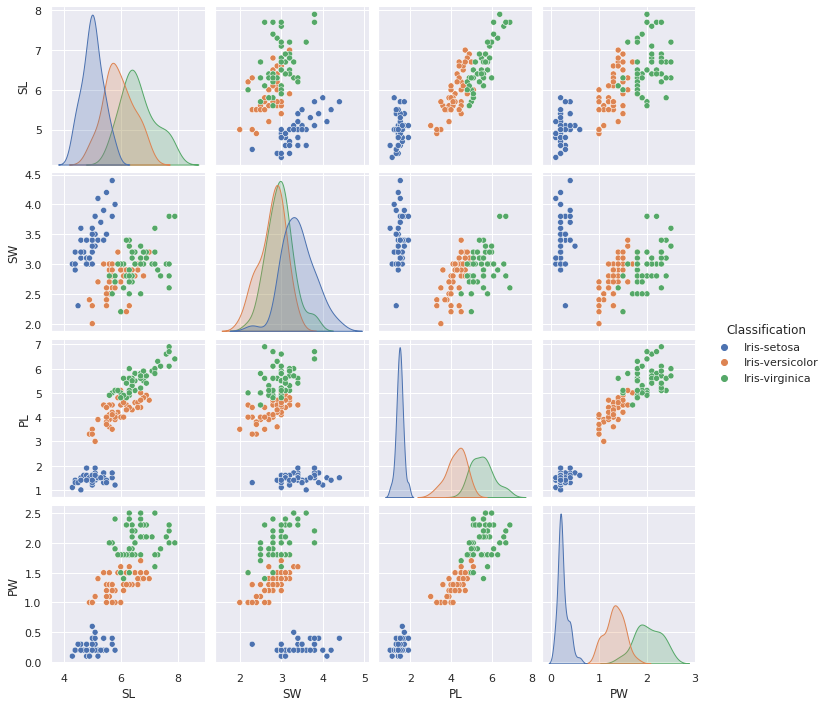

In [14]:
sns.set()
sns.pairplot(df[['SL', 'SW', 'PL', 'PW', 'Classification']], hue="Classification", diag_kind="kde")

##**Insights:**
  _As from the above visualization,_
    
  *   SW,SL,PW,PL are normally distributed
  *   Iris-versicolor and Iris-virginica scatters almost similarly



##***Checking & Handling Missing Values***

######***Checking for Null values***

In [15]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
SL,7
SW,6
PL,6
PW,0
Classification,0


######***Filling missing values for the features SL, SW and PL by using Median***

In [16]:
for i in ['SL', 'SW', 'PL']:
  df[i]=df[i].fillna(df[i].median())

######***Checking whether the Null values are filled or not***

In [17]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
SL,0
SW,0
PL,0
PW,0
Classification,0


##***Checking & Handling Outliers***

######***Checking for the outliers***

{'boxes': [<matplotlib.lines.Line2D at 0x7f98ef2a0d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98ef2a2dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98ef2a8e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98ef2a88d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98ef2a0e90>,
  <matplotlib.lines.Line2D at 0x7f98ef2a2890>]}

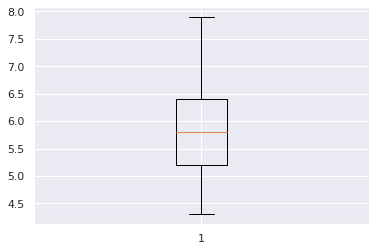

In [18]:
plt.boxplot(df['SL'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f98ed9f84d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98ed9fe550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98eda06590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98eda06050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98ed9f8a90>,
  <matplotlib.lines.Line2D at 0x7f98ed9f8fd0>]}

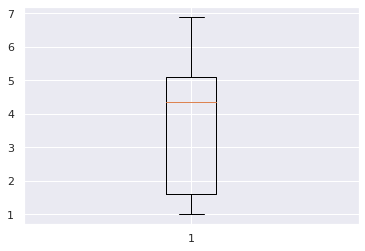

In [19]:
plt.boxplot(df['PL'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f98ed9e4250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98ed9ed2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98ed975310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98ed9edd90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98ed9e4810>,
  <matplotlib.lines.Line2D at 0x7f98ed9e4d50>]}

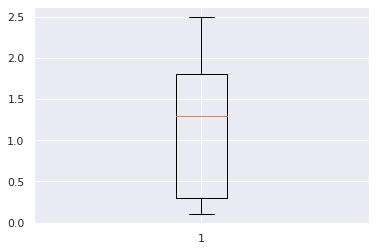

In [20]:
plt.boxplot(df['PW'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f98ed94fad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98ed957b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98ed95db90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98ed95d650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98ed9570d0>,
  <matplotlib.lines.Line2D at 0x7f98ed957610>]}

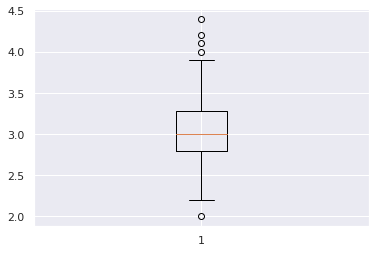

In [21]:
plt.boxplot(df['SW'])

######***Handling the outliers present in the feature - SW by removing the values below the lower limit***

In [22]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3-1.5*IQR
df.loc[df['SW']<low_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [23]:
df.drop(df.loc[df['SW']<low_limit].index, inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f98ed904a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98ed8c9510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98ed8cf550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98ed8c9fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98ed8c2a50>,
  <matplotlib.lines.Line2D at 0x7f98ed8c2f90>]}

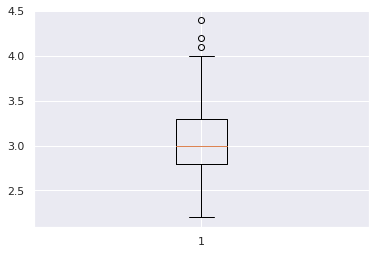

In [24]:
plt.boxplot(df['SW'])

##***Encoding***

######***Dummy encoding for the feature - Classification***

In [25]:
dummy_classification = pd.get_dummies(df['Classification'])
df.join(dummy_classification)

,SL,SW,PL,PW,Classification,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.40,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.40,0.2,Iris-setosa,1,0,0
2,5.8,3.2,1.30,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.50,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.40,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.00,1.9,Iris-virginica,0,0,1
147,6.5,3.0,4.35,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.40,2.3,Iris-virginica,0,0,1


##***Feature Scaling***

######***Since the features - SL, SW, PL, PW are normally distributed, we can performing Standard scaling on the feature set***

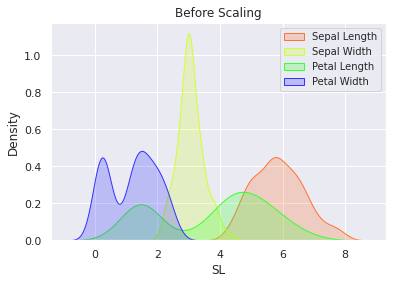

In [26]:
plt.title('Before Scaling')
fig = sns.kdeplot(df['SL'], shade=True, color="#FF7433", label="Sepal Length")
fig = sns.kdeplot(df['SW'], shade=True, color="#D1FF33", label="Sepal Width")
fig = sns.kdeplot(df['PL'], shade=True, color="#3AFF33", label="Petal Length")
fig = sns.kdeplot(df['PW'], shade=True, color="#3433FF", label="Petal Width")
plt.legend(fontsize=10)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['SL', 'SW', 'PL', 'PW']]=scaler.fit_transform(df[['SL', 'SW', 'PL', 'PW']])
df[['SL', 'SW', 'PL', 'PW']]=pd.DataFrame(df[['SL', 'SW', 'PL', 'PW']])

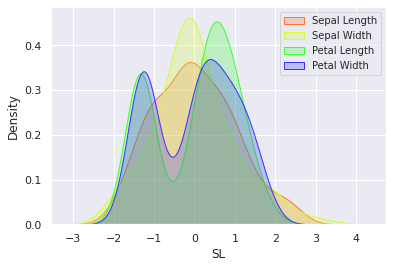

In [28]:
fig = sns.kdeplot(df['SL'], shade=True, color="#FF7433", label="Sepal Length")
fig = sns.kdeplot(df['SW'], shade=True, color="#D1FF33", label="Sepal Width")
fig = sns.kdeplot(df['PL'], shade=True, color="#3AFF33", label="Petal Length")
fig = sns.kdeplot(df['PW'], shade=True, color="#3433FF", label="Petal Width")
plt.legend(fontsize=10)
plt.show()

##***Dataset after Pre-processing steps***

In [29]:
df.head()

,SL,SW,PL,PW,Classification
0,-0.942325,1.07871,-1.377390,-1.31064,Iris-setosa
1,-1.190612,-0.13159,-1.377390,-1.31064,Iris-setosa
2,-0.073320,0.35253,-1.435217,-1.31064,Iris-setosa
3,-1.563042,0.11047,-1.319562,-1.31064,Iris-setosa
4,-1.066468,1.32077,-1.377390,-1.31064,Iris-setosa


In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe(include='all')

,SL,SW,PL,PW,Classification
count,149.00000,149.00000,149.00000,149.00000,149
unique,nan,nan,nan,nan,3
top,nan,nan,nan,nan,Iris-virginica
freq,nan,nan,nan,nan,50
mean,0.00000,0.00000,0.00000,-0.00000,NaN
std,1.00337,1.00337,1.00337,1.00337,NaN
min,-1.93547,-2.06807,-1.60870,-1.44170,NaN
25%,-0.81818,-0.61571,-1.26173,-1.17958,NaN
50%,-0.07332,-0.13159,0.32853,0.13106,NaN
75%,0.67154,0.59459,0.76224,0.78638,NaN


##**3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)**

######***Defining the variable X and y***

In [31]:
X=df.drop(['Classification'], axis=1)
y=df['Classification']

######***Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset***

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state=1)

##***Logistic Regression Model***
######***Training our model***

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

######***Making predictions based on our model***

In [34]:
predictions=logreg.predict(X_test)

######***Evaluating the accuracy of a model***

In [35]:
print('Accuracy of Logistic regression classifier on training set:', round(logreg.score(X_train, y_train),2))
print('Accuracy score of Logistic regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Logistic regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Logistic regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Logistic regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy score of Logistic regression classifier on test set: 1.0
Precision score of Logistic regression classifier on test set: 1.0
Recall score of Logistic regression classifier on test set: 1.0
F1 score of Logistic regression classifier on test set: 1.0


######***Confusion matrix of the model***

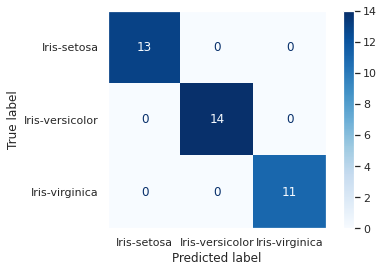

In [36]:
disp = ConfusionMatrixDisplay.from_estimator(
        logreg.fit(X_train, y_train),
        X_test,
        y_test,        
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***K-Nearest Neighbors Model***
######***Training our model***

*   p = 2 , Euclidean Distance
*   n_neighbors = 5, the value of K neighbors
*   metric = 'minkowski'

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

######***Making predictions based on our model***

In [38]:
predictions=knn.predict(X_test)

######***Evaluating the accuracy of a model***

In [39]:
print('Accuracy of KNN regression classifier on training set:', round(knn.score(X_train, y_train),2))
print('Accuracy score of KNN regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of KNN regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of KNN regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of KNN regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of KNN regression classifier on training set: 0.97
Accuracy score of KNN regression classifier on test set: 1.0
Precision score of KNN regression classifier on test set: 1.0
Recall score of KNN regression classifier on test set: 1.0
F1 score of KNN regression classifier on test set: 1.0


######***Confusion matrix of the model***

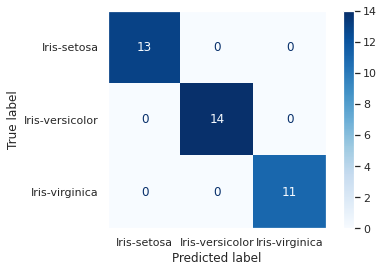

In [40]:
disp = ConfusionMatrixDisplay.from_estimator(
        knn.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Linear Kernel***
######***Training our model***

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

SVC(kernel='linear')

######***Making predictions based on our model***

In [42]:
predictions=svm.predict(X_test)

######***Evaluating the accuracy of a model***

In [43]:
print('Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set:', round(svm.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set: 0.96
Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.95
Precision score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.96
Recall score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.95
F1 score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.95


######***Confusion matrix of the model***

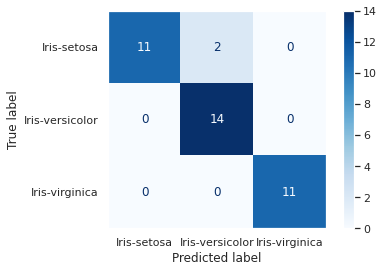

In [44]:
disp = ConfusionMatrixDisplay.from_estimator(
        svm.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Polynomial Kernel***
######***Training our model***

*   The degree of the polynomial, degree=8



In [45]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=8)
svm.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

######***Making predictions based on our model***

In [46]:
predictions=svm.predict(X_test)

######***Evaluating the accuracy of a model***

In [47]:
print('Accuracy of Support Vector Machine with Polynomial Kernel regression classifier on training set:', round(svm.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Polynomial Kernel regression classifier on training set: 0.81
Accuracy score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 0.79
Precision score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 0.85
Recall score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 0.77
F1 score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 0.76


######***Confusion matrix of the model***

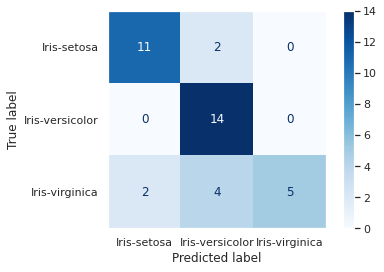

In [48]:
disp = ConfusionMatrixDisplay.from_estimator(
        svm.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Gaussian Kernel***
######***Training our model***



In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

######***Making predictions based on our model***

In [50]:
predictions=svm.predict(X_test)

######***Evaluating the accuracy of a model***

In [51]:
print('Accuracy of Support Vector Machine with Gaussian Kernel regression classifier on training set:', round(svm.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Gaussian Kernel regression classifier on training set: 0.97
Accuracy score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 1.0
Precision score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 1.0
Recall score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 1.0
F1 score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 1.0


######***Confusion matrix of the model***

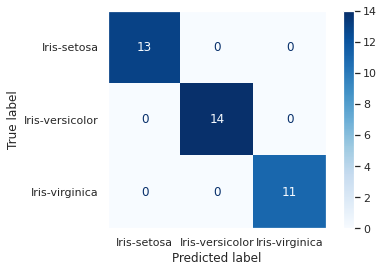

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(
        svm.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Decision Tree Model***
######***Training our model***



In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

######***Making predictions based on our model***

In [54]:
predictions = dt.predict(X_test)

######***Evaluating the accuracy of a model***

In [55]:
print('Accuracy of Decision Tree regression classifier on training set:', round(dt.score(X_train, y_train),2))
print('Accuracy score of Decision Tree regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Decision Tree regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Decision Tree regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Decision Tree regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Decision Tree regression classifier on training set: 1.0
Accuracy score of Decision Tree regression classifier on test set: 0.97
Precision score of Decision Tree regression classifier on test set: 0.98
Recall score of Decision Tree regression classifier on test set: 0.97
F1 score of Decision Tree regression classifier on test set: 0.97


######***Confusion matrix of the model***

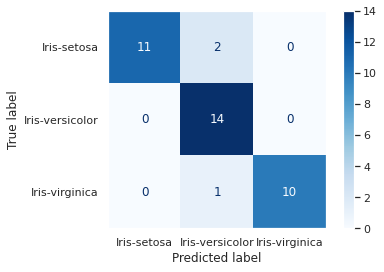

In [56]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Random Forest Model***
######***Training our model***

*   The number of trees in the forest (n_estimators) = 100



In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

######***Making predictions based on our model***

In [58]:
predictions = clf.predict(X_test)

######***Evaluating the accuracy of a model***

In [59]:
print('Accuracy of Random Forest regression classifier on training set:', round(clf.score(X_train, y_train),2))
print('Accuracy score of Random Forest regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Random Forest regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Random Forest regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Random Forest regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Random Forest regression classifier on training set: 1.0
Accuracy score of Random Forest regression classifier on test set: 0.92
Precision score of Random Forest regression classifier on test set: 0.94
Recall score of Random Forest regression classifier on test set: 0.92
F1 score of Random Forest regression classifier on test set: 0.92


######***Confusion matrix of the model***

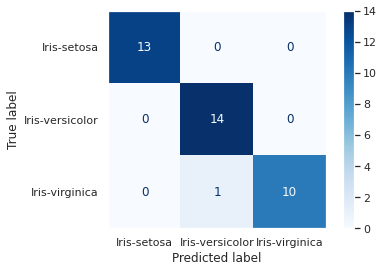

In [60]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##**Summary:**
Algorithm  | Accuracy on Training Set | Accuracy on Test Set | Precision Score | Recall Score | F1 Score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------| 
Logistic Regression | 0.96 | 1.0 | 1.0 | 1.0 | 1.0 |
K-NN | 0.97 | 1.0 | 1.0 | 1.0 | 1.0 |
SVM-Linear | 0.96 | 0.95 | 0.96 | 0.95 | 0.95 |
SVM-Polynomial | 0.81 | 0.79 | 0.85 | 0.77 | 0.76 |
SVM-Gaussian | 0.97 | 1.0 |1.0 |1.0 |1.0 |
Decision Tree | 1.0 | 0.97 | 0.98 | 0.97 | 0.97 |
Random Forest | 1.0 | 0.97 | 0.98 | 0.97 | 0.97 |

##**Insights:**
_Among the 7 Classification algorithms we have performed, We can see that_ 

*   The classifier gives almost similar accuracy scores except SVM Polynomial.
*   But, the Accuracy on Test Set, Precision Score, Recall Score and F1 Score remained same for the classifiers - Logistic Regression, K-NN, SVM-Gaussian.
*   Let us conclude that, among Logistic Regression, K-NN, SVM-Gaussian - any these classifiers can be used for predicting the Species of Iris



